#**Linear Programming**

## Task 1

Concider the following Linear problem
\begin{equation}
\begin{aligned}
\min_{x} \quad & x_1 + x_2\\
\textrm{s.t.} \quad & 9x_1 + 3x_2 \leq 56\\
& -7x_1 + 9x_2 \leq 56\\
& -1 \leq x \leq 1
\end{aligned}
\end{equation}

Formulate the problem using CVXPY and scipy.optimize.linprog
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html

In [ ]:
import cvxpy as cp
import numpy as np
from scipy.optimize import linprog

x = cp.Variable(shape=(2,1))
A = np.array([[9,3],[-7,9]])

constraints = [cp.matmul(A, x) <= 56, x<=1, x>=-1]
objective = cp.Minimize(x[0]+x[1])
problem = cp.Problem(objective, constraints)

solution = problem.solve()
print(solution)
print(x.value.T)

b = np.array([56, 56])
x0_bounds = (-1, 1)
x1_bounds = (-1, 1)
c = [1, 1]

res = linprog(c, A_ub=A, b_ub=b, bounds=[x0_bounds
        , x1_bounds])
print(res.x)

-1.9999999994829993
[[-1. -1.]]
[-1. -1.]


## Task 2
You are given three non empty sets:

\begin{equation*}
\begin{aligned}
x_{(1)},...,x_{(n)} \\
y_{(1)},...,y_{(m)} \\
z_{(1)},...,z_{(p)} \\
\end{aligned}
\end{equation*} in $\mathbb{R}^n$ where you have to find corresponding affine functions in the following form:
\begin{equation}
    f_i(\mu) = a_i^T\mu -b_i, \; i=1,2,3, \; \mu = x,y,z
\end{equation} subject to the following constraints:
\begin{equation*}
\begin{aligned}
\quad & f_1(x_{(j)}) > max \{f_2(x_{(j)}), f_3(x_{(j)})\}, \; j = 1,...,n\,\\
  \quad & f_2(y_{(j)}) > max \{f_1(y_{(j)}), f_3(y_{(j)})\}, \; j = 1,...,m\,\\
  \quad & f_3(z_{(j)}) > max \{f_1(z_{(j)}), f_2(z_{(j)})\}, \; j = 1,...,p\,\\
 \quad & a_1 + a_2 + a_3 = 0, \\
 \quad & b_1 + b_2 + b_3 = 0 ,
\end{aligned}
\end{equation*}
> Use the following script for generating three sets in $\mathbf{R}^2$ and solve the latter problem using CVXPY

[-0.57972949 -0.96772942] [-6.97028652]


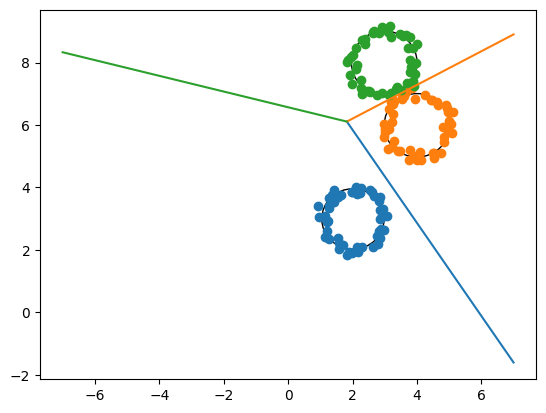

In [ ]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
import random
from random import random
import math


def clusters(n, points, centers, r):
    sets = []
    def cluster(points, center, radius):
        npoints = 50
        r = radius
        t = np.linspace(0, 2*np.pi, npoints, endpoint=False)
        x = center[0] + r * np.cos(t) + np.random.uniform(-0.2,0.2,t.shape[0])
        y = center[1] + r * np.sin(t) + np.random.uniform(-0.2,0.2,t.shape[0])
        return np.vstack((x,y))

    sets = []
    for i in range(n):
        set_i = cluster(points, centers[i], r)
        sets.append(set_i)
    return sets

sets = np.array(clusters(3, 100, [(2,3), (4,6), (3, 8)], 1.0))

def get_circle(U):
    cx = cp.Variable()
    cy = cp.Variable()
    obj = cp.Minimize(cp.norm(cp.vstack((U[0,:] - cx, U[1,:] - cy))))
    prob = cp.Problem(obj, [])
    prob.solve()

    cx, cy = map(lambda x: x.value, [cx, cy])
    xc = np.array([cx, cy])
    r_hat = (U.T - xc)
    mean_r = np.sum(r_hat * r_hat, axis=1).mean()
    r = np.sqrt(mean_r)
    return xc, r

def draw_circles(sets):
    ax = plt.gca()
    for set_i in sets:
        xc, r = get_circle(set_i)
        circle = plt.Circle(xc, r, fill=False)
        ax.add_patch(circle)

X = sets[0]
Y = sets[1]
Z = sets[2]

a1 = cp.Variable(shape=(2,))
b1 = cp.Variable(shape=(1,))
a2 = cp.Variable(shape=(2,))
b2 = cp.Variable(shape=(1,))
a3 = cp.Variable(shape=(2,))
b3 = cp.Variable(shape=(1,))

constraints = [
  a1.T @ X - b1 >= cp.maximum(a2.T @ X - b2,a3.T @ X - b3),
  a2.T @ Y - b2 >= cp.maximum(a3.T @ Y - b3,a1.T @ Y - b1),
  a3.T @ Z - b3 >= cp.maximum(a1.T @ Z - b1,a2.T @ Z - b2),
  a1 + a2 + a3 == 0,
  b1 + b2 + b3 == 0
]

obj = cp.Minimize(0)
prob = cp.Problem(obj, constraints)
prob.solve()

a1,a2,a3,b1,b2,b3 = map(lambda x: x.value,[a1,a2,a3,b1,b2,b3])
print(a1,b1)
print(a2, b2)
print(a3, b3)

t = np.linspace(-7,7,100*14)
u1 = a1-a2; u2 = a2-a3; u3 = a3-a1
v1 = b1-b2; v2 = b2-b3; v3 = b3-b1
line1 = (-t*u1[0]+v1)/u1[1]
idx1 = np.where(u2.dot(np.array([t,line1]))-v2>0)[0]
line2 = (-t*u2[0]+v2)/u2[1]
idx2 = np.where(u3.dot(np.array([t,line2]))-v3>0)[0]
line3 = (-t*u3[0]+v3)/u3[1]
idx3 = np.where(u1.dot(np.array([t,line3]))-v1>0)[0]

draw_circles(sets)

plt.scatter(X[0,:], X[1,:])
plt.scatter(Y[0,:], Y[1,:])
plt.scatter(Z[0,:], Z[1,:])

plt.plot(t[idx1],line1[idx1])
plt.plot(t[idx2],line2[idx2])
plt.plot(t[idx3],line3[idx3])
plt.show()